In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [53]:
price1 = pd.read_csv('price1.csv', sep = ';')
price2 = pd.read_csv('price2.csv', sep = ';')
price3 = pd.read_csv('price3.csv', sep = ';')

In [54]:
#convert timestamp in each one to a float
price1['timestamp'] = price1['timestamp'].apply(lambda x: float(x))
price2['timestamp'] = price2['timestamp'].apply(lambda x: float(x))
price3['timestamp'] = price3['timestamp'].apply(lambda x: float(x))

price2['timestamp'] = price2['timestamp'] + price1['timestamp'].max() + 100
price3['timestamp'] = price3['timestamp'] + price2['timestamp'].max() + 100

In [55]:
combined = pd.concat([price1, price2, price3])
combined.head(15)

dip = combined[combined["product"] == "DIP"].drop(columns = ["product"])
baguette = combined[combined["product"] == "BAGUETTE"].drop(columns = ["product"])
ukulele = combined[combined["product"] == "UKULELE"].drop(columns = ["product"])
basket = combined[combined["product"] == "PICNIC_BASKET"].drop(columns = ["product"])


In [56]:
dip = dip.rename(columns={"mid_price": "dip_price"})
baguette = baguette.rename(columns={"mid_price": "baguette_price"})
ukulele = ukulele.rename(columns={"mid_price": "ukulele_price"})
basket = basket.rename(columns={"mid_price": "basket_price"})
#drop columns that are not timestamp or price
dip = dip[["timestamp", "dip_price"]]
baguette = baguette[["timestamp", "baguette_price"]]
ukulele = ukulele[["timestamp", "ukulele_price"]]
basket = basket[["timestamp", "basket_price"]]

In [57]:
df = pd.merge(dip, baguette, on = "timestamp")
df = pd.merge(df, ukulele, on = "timestamp")
df = pd.merge(df, basket, on = "timestamp")
df.head()

,timestamp,dip_price,baguette_price,ukulele_price,basket_price
0,0.0,7000.0,12000.0,21000.0,73365.0
1,100.0,7001.5,12002.0,21003.0,73383.5
2,200.0,7001.5,12002.5,21008.5,73385.0
3,300.0,7003.0,12003.5,21000.5,73371.0
4,400.0,7002.0,12004.0,21000.5,73342.5


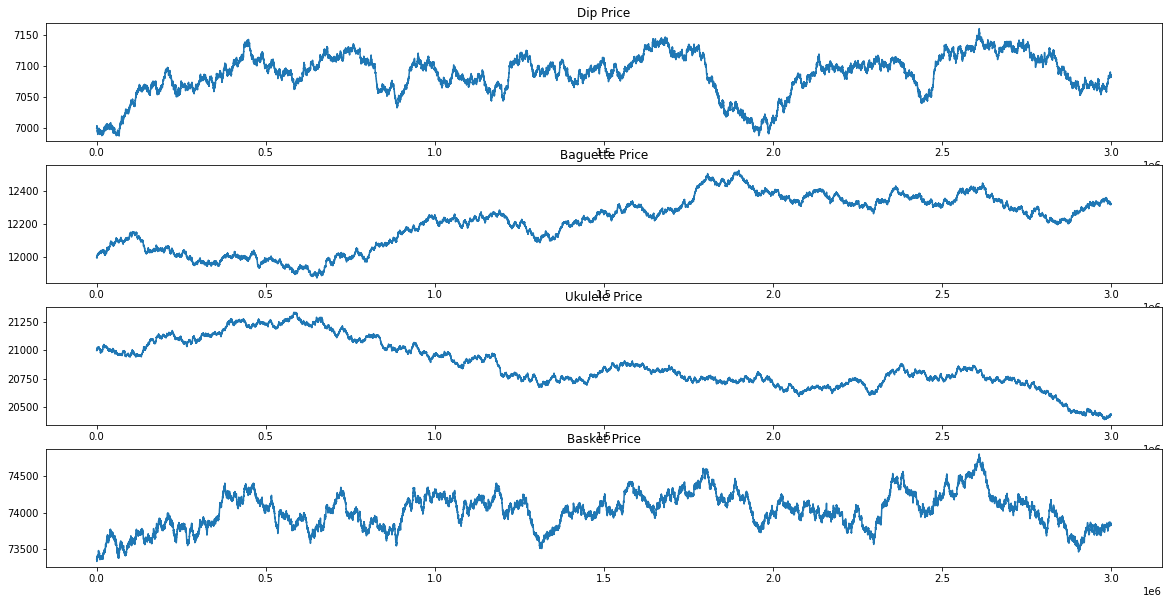

In [58]:
#graph the four prices vertically stacked
fig, ax = plt.subplots(4, 1)
ax[0].plot(df['timestamp'], df['dip_price'])
ax[0].set_title('Dip Price')
ax[1].plot(df['timestamp'], df['baguette_price'])
ax[1].set_title('Baguette Price')
ax[2].plot(df['timestamp'], df['ukulele_price'])
ax[2].set_title('Ukulele Price')
ax[3].plot(df['timestamp'], df['basket_price'])
ax[3].set_title('Basket Price')
plt.show()

In [59]:
#add a new column called that is 2*baguette + 4*dip + ukulele
df['basket_proxy'] = 2*df['baguette_price'] + 4*df['dip_price'] + df['ukulele_price']

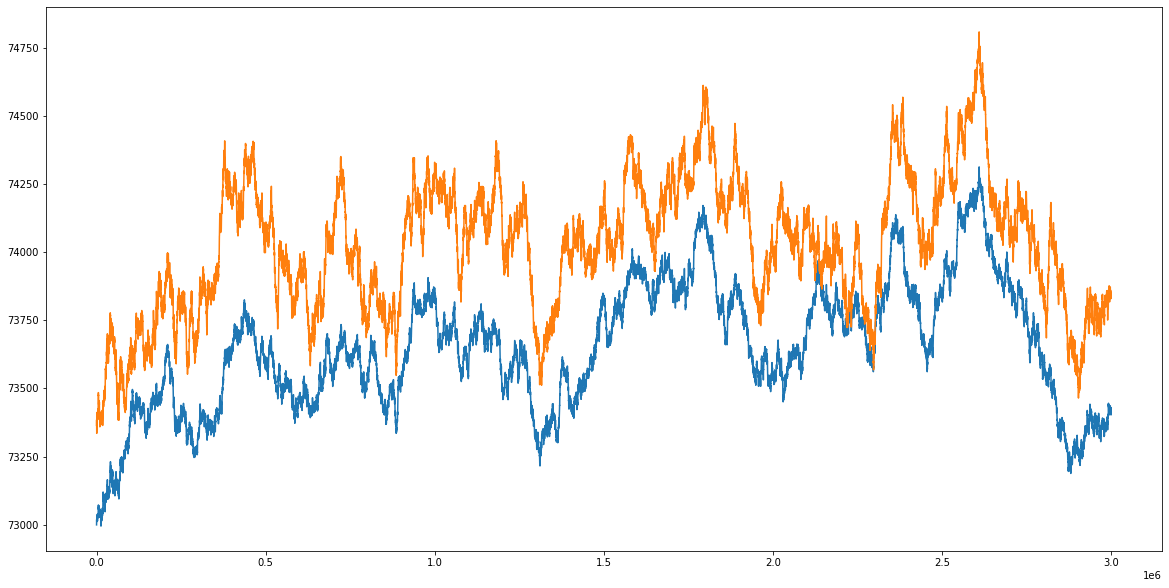

In [60]:
#plot basket proxy vs basket price as two lines with the same x and y axis
fig, ax = plt.subplots(1, 1)
ax.plot(df['timestamp'], df['basket_proxy'], label = 'basket proxy')
ax.plot(df['timestamp'], df['basket_price'], label = 'basket price')

In [61]:
#add a column called difference that is the difference between basket price and basket proxy
df['difference'] = df['basket_price'] - df['basket_proxy']

Text(0.5, 1.0, 'Difference between Basket Price and Basket Proxy')

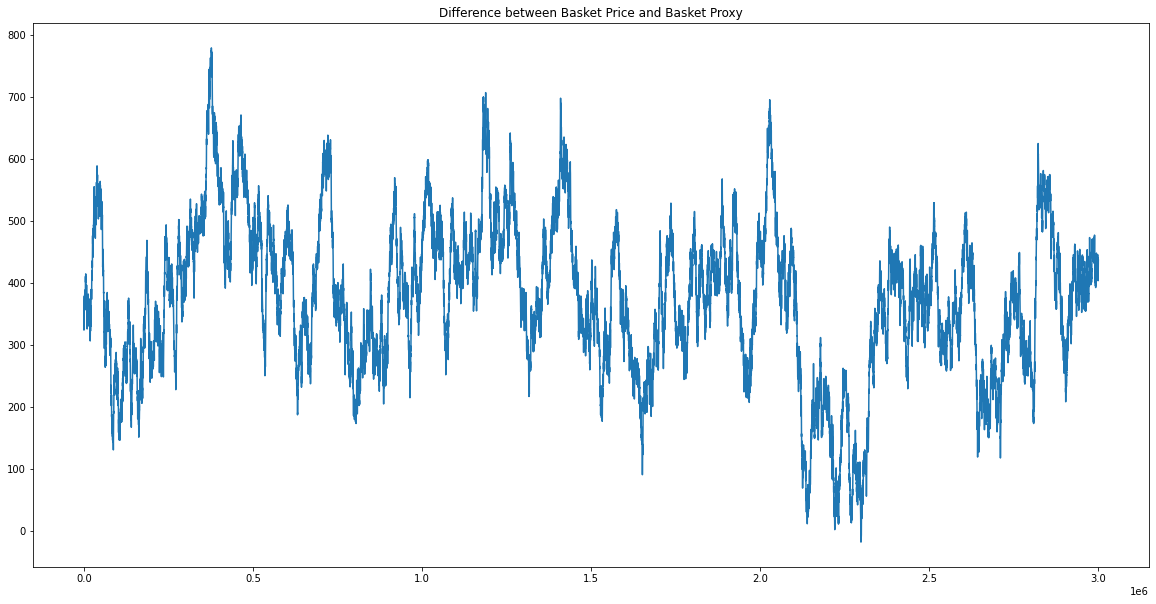

In [62]:
#plot the difference
fig, ax = plt.subplots(1, 1)
ax.plot(df['timestamp'], df['difference'])
ax.set_title('Difference between Basket Price and Basket Proxy')

In [63]:
#add a column called logratio that is the log of (basket price / basket proxy)
df['ratio'] = df['basket_price'] / df['basket_proxy']
df['logratio'] = df['ratio'].apply(lambda x: log(x))
logAvg = df['logratio'].mean()
logStd = df['logratio'].std()

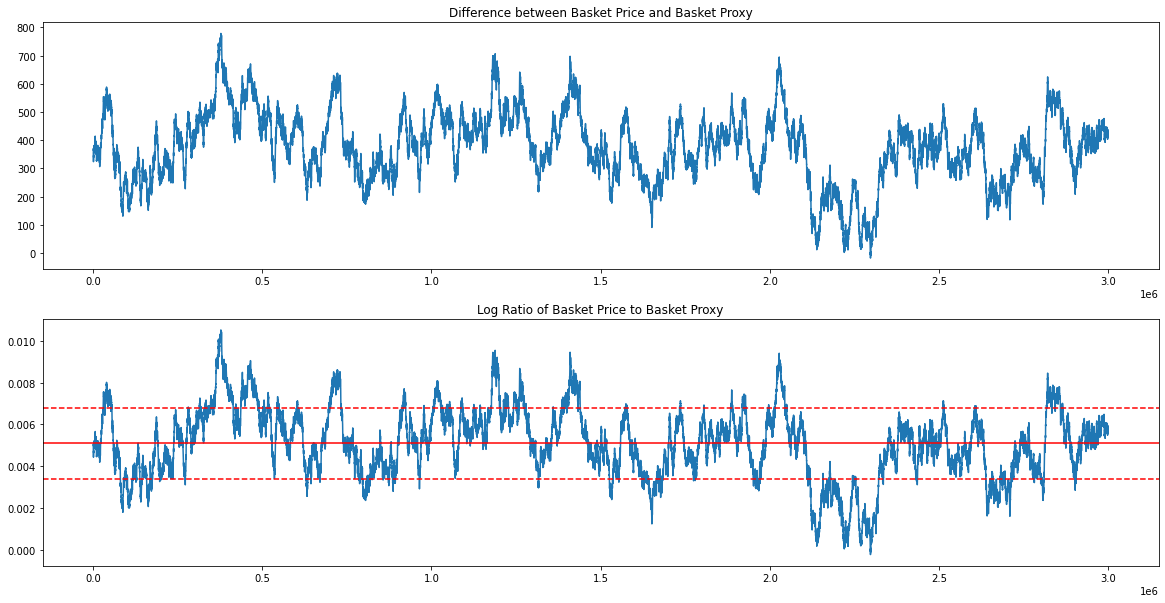

In [64]:
#plot spread and logratio vertically stacked
fig, ax = plt.subplots(2, 1)
ax[0].plot(df['timestamp'], df['difference'])
ax[0].set_title('Difference between Basket Price and Basket Proxy')
ax[1].plot(df['timestamp'], df['logratio'])
ax[1].set_title('Log Ratio of Basket Price to Basket Proxy')
#plot a horizontal line at the mean of logratio, and a line at the mean plus one standard deviation and one standard deviation below
ax[1].axhline(y = logAvg, color = 'r', linestyle = '-')
ax[1].axhline(y = logAvg + logStd, color = 'r', linestyle = '--')
ax[1].axhline(y = logAvg - logStd, color = 'r', linestyle = '--')

In [65]:
#read the csv file called log.txt
logg = pd.read_csv('log.txt', sep = ';')
#do the exact same thing as above, but with the log file instead of the price file

In [66]:
logBaguette = logg[logg["product"] == "BAGUETTE"].drop(columns = ["product"])
logDip = logg[logg["product"] == "DIP"].drop(columns = ["product"])
logUkulele = logg[logg["product"] == "UKULELE"].drop(columns = ["product"])
logBasket = logg[logg["product"] == "PICNIC_BASKET"].drop(columns = ["product"])

In [67]:
logDip = logDip.rename(columns={"mid_price": "dip_price"})
logBaguette = logBaguette.rename(columns={"mid_price": "baguette_price"})
logUkulele = logUkulele.rename(columns={"mid_price": "ukulele_price"})
logBasket = logBasket.rename(columns={"mid_price": "basket_price"})
#drop columns that are not timestamp or price
logDip = logDip[["timestamp", "dip_price"]]
logBaguette = logBaguette[["timestamp", "baguette_price"]]
logUkulele = logUkulele[["timestamp", "ukulele_price"]]
logBasket = logBasket[["timestamp", "basket_price"]]


In [68]:
logDf = pd.merge(logDip, logBaguette, on = "timestamp")
logDf = pd.merge(logDf, logUkulele, on = "timestamp")
logDf = pd.merge(logDf, logBasket, on = "timestamp")
logDf.head()


,timestamp,dip_price,baguette_price,ukulele_price,basket_price
0,0,7021.0,12382.0,20697.5,74002.5
1,100,7020.0,12386.0,20696.0,73989.5
2,200,7019.0,12384.0,20696.5,74008.0
3,300,7018.0,12386.0,20697.0,74012.0
4,400,7019.5,12389.0,20696.5,74021.0


In [69]:
#calculate the basket proxy
logDf['basket_proxy'] = 2*logDf['baguette_price'] + 4*logDf['dip_price'] + logDf['ukulele_price']

In [70]:
#calculate the difference between basket price and basket proxy
logDf['difference'] = logDf['basket_price'] - logDf['basket_proxy']

In [72]:
#calculate the log ratio of basket price to basket proxy
logDf['ratio'] = logDf['basket_price'] / logDf['basket_proxy']
logDf['logratio'] = logDf['ratio'].apply(lambda x: log(x))

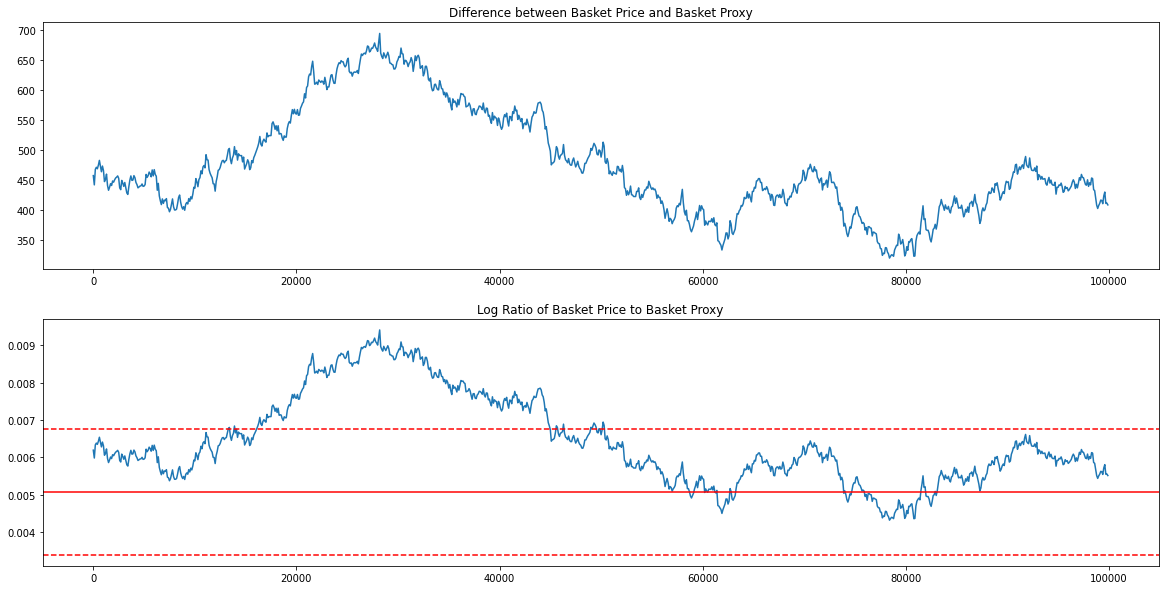

In [73]:
#plot stacked graphs of difference and logratio
fig, ax = plt.subplots(2, 1)
ax[0].plot(logDf['timestamp'], logDf['difference'])
ax[0].set_title('Difference between Basket Price and Basket Proxy')
ax[1].plot(logDf['timestamp'], logDf['logratio'])
ax[1].set_title('Log Ratio of Basket Price to Basket Proxy')
#plot the same horizontal lines as above
ax[1].axhline(y = logAvg, color = 'r', linestyle = '-')
ax[1].axhline(y = logAvg + logStd, color = 'r', linestyle = '--')
ax[1].axhline(y = logAvg - logStd, color = 'r', linestyle = '--')


In [ ]:
#print the mean and standard deviation of logratio
print(logDf['logratio'].mean())
print(logDf['logratio'].std())